In [2]:
'''
This is used for finding the log pattern in a log file
'''
# filter the first parts except the message part
# read time to other part
# in this program, spark will be used to calculate the key with collect
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
import re
from pyspark.sql import Row

global patterns
# system_log_pattern = '(\S+) (\w+) (\S+) (\S+) (\S+) (.*)'
# system_log_pattern = '(\S+) (\w+) (\S+) .*: (\S+)'
system_log_pattern = '(\S+)(\s+)(\w+) (\S+) .*: (.*)'


# the module to read file:
'''
def read_log_file(filename):
    lines,times = [],[]
    with open(filename,'r') as f:
        for line in f:
            print(type(line))
            #line = line.split(' ')
            time = line[2:3]
            line = line[5:]
            lines.append(line)
            times.append(time)
        return times,lines
'''
'''
# this is module used to process the json file log
def parse_system_log(filename):
    with open(filename, 'r') as f:
        for line in f:
            match = re.search(system_log_pattern, line)
        if match is None:
            raise Exception ('Invalid system log %s'%line)
        return Row(
            month = match.group(1),
            day = match.group(2),
            time = match.group(3),
            host_name = match.group(4),
            syslog_process_uid = match.group(5),
            message = match.group(6)
        )
'''


# this is the module used to process the lined log file
def parse_system_log_line(filename):
    with open(filename,'r') as f:
        with open('../data/System_logs/times_log.txt','w') as f1:
            with open('../data/System_logs/messages_log.txt','w') as f2:
#                 times = ''
#                 messages = ''
                for line in f:
                    match = re.search(system_log_pattern, line)
                    if match is None:
                    
                        raise Exception ('Invalid system log %s'% line)
                        # match1 = re.search(system_log_pattern1, line)
                        
                    else:
                        month = match.group(1)
                        day = match.group(3)
                        time = match.group(4)
                        message = match.group(5)
                        
#                         month = match.group(1)
#                         day = match.group(2)
#                         time = match.group(3)
#                         host_name = match.group(4)
#                         syslog_process_uid = match.group(5)
#                         message = match.group(6)
                      

                        f1.write(time + '\n')

                        f2.write(message + '\n')
#                 times += str(time)+' '
#                 messages += str(message)+' '
#lines = read_log_file('data/Linux_10.txt')
#print(lines)

In [3]:
# parse_system_log_line('../data/System_logs/Linux_10.txt') # this is for test
parse_system_log_line('../data/System_logs/Linux_2k.log') # this is implementation

In [4]:
# read filtered lines into two file, time_file and message_file
# def write_basic_log_keys(times, lines):
#     with open("data/times_log.txt",'w') as f1:
#         for i in range(len(times)):
#             f1.write(str(times[i]))
        
#     with open("data/messages_log.txt",'w') as f2:
#         for j in range(len(lines)):
#             f2.write(str(lines[j]))
    

In [5]:
#times,lines=read_log_file('data/System_logs/Linux_10.txt')
# write_basic_log_keys(times,lines)

In [6]:
import re

# this part is used for erasing parameters by empirical rules
def erase_string(filename):
    # the file should be messages_log.txt
    with open(filename,'r') as f:
        with open('../data/System_logs/erased_message_log.txt','w') as f1:
            for line in f:
                line = line.split(' ')    
                for i in range(len(line)):
                    line[i] = line[i].split('=')[0]
                    
                line = list(line)
                # filter the blank in a list, and line_str will be string
                line_str = ' '.join(line).split()
                line_list = list(line_str)
                # transfer the list data to string and implement further filter
                line_str = ' '.join(line_list)
                # file all the numbers
                line_str = re.sub("\d|;|[|]|\(|\)|:|\.|=",'',line_str)
                #line_str = line_str.strip()  
                #print(type(line_str))
                print(line_str)
                f1.write(line_str+'\n')


In [7]:
erase_string('../data/System_logs/messages_log.txt')

authentication failure logname uid euid tty ruser rhost
check pass user unknown
authentication failure logname uid euid tty ruser rhost
authentication failure logname uid euid tty ruser rhost user
authentication failure logname uid euid tty ruser rhost user
authentication failure logname uid euid tty ruser rhost user
authentication failure logname uid euid tty ruser rhost user
authentication failure logname uid euid tty ruser rhost user
authentication failure logname uid euid tty ruser rhost user
authentication failure logname uid euid tty ruser rhost user
authentication failure logname uid euid tty ruser rhost user
authentication failure logname uid euid tty ruser rhost user
authentication failure logname uid euid tty ruser rhost user
session opened for user cyrus by uid
session closed for user cyrus
ALERT exited abnormally with []
session opened for user news by uid
session closed for user news
check pass user unknown
authentication failure logname uid euid tty ruser rhost
check pass

In [8]:
def transfer_lowercase(filename, filename1):
    with open(filename, 'r') as f:
        line_str=''
        with open(filename1, 'w') as f1:
            for line in f:
                line = line.split(' ')
                for i in range(len(line)):
                    line[i]=line[i].lower()
                    line_str +=line[i]+' '        
            f1.write(line_str)

In [9]:
transfer_lowercase('../data/System_logs/erased_message_log.txt','../data/System_logs/lower_erased_message_log.txt')

In [10]:
# csv transform module--------not necessary part
import csv
import unidecode

def transform_to_csv(filename):
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
        contexts = f.readlines()
        
    with open('../data/System_logs/raw_log_original.csv', 'w', newline ='') as csvfile:
        fieldnames = ['Seq_number','raw_log']
        writer = csv.DictWriter(csvfile, fieldnames = fieldnames)
        writer.writeheader()
        for i,line in enumerate(contexts):
            print("we are writing %d line %s into csv file"%(i, line))
            writer.writerow({'Seq_number':i, "raw_log":line})
    
    return writer


In [11]:
transform_to_csv('../data/System_logs/lower_erased_message_log.txt')

In [12]:
# cluster the raw log keys
# we need to find a proper metric to represent the similarity of two raw log keys
# we will use the string edit distance, while we need weighted edit distance ------ sigmoid similar function 
# if the weighted edit distance between two log keys is smaller than a threshold X, connect them with a link
## the principle behind the function is:
###    two log keys rk1 and rk2, denote operations to transform they as OA1,OA2,OA eo, eo is the number of operations

# It mianly includes these parts:
# 1. csv transform module  2. Operations module---EO  3.sigmoid similar function
# the process is:
### 1. compute the weighted edit distance between them
### 2. obtain a set of distance between them, each distance is either inner-class distance or inter-class distance 
### 3. use a k-means clustering algorithrm to cluster all distances into two groups
### 4. select the largest distance from the inner-class distance group as the value of threshold X


In [13]:
# the edit_distance is executed by independent module in the same directory by edit_distance file

'''
import brew_distance

# global distance_size

# filename is the file of prepocessed log file, filename1 is the file of distance list
def brew_distance_strings(filename,filename1):
    with open(filename, 'r') as f:
        with open(filename1, 'w') as f1:
            contexts = f.readlines()
            #print(type(contexts))
            list = []
            for i in range(len(contexts)-1):

                try:
                    print("Determing two raw logs!")
                    print(contexts[i])
                    print(contexts[i+1])
                    # print(str(brew_distance.distance(contexts[i], contexts[i+1]))[1:3])
                    list.append(str(brew_distance.distance(contexts[i], contexts[i+1]))[1:3])
                except brew_distance.BrewDistanceException as error:
                    print(str(error))
            print(list)
            print(len(list))

            distance_size = len(list)

            for i in range(len(list)):
                f1.write(list[i])
            return list

brew_distance_strings('data/System_logs/lower_erased_message_log.txt','data/System_logs/log_distance.txt')

'''

'\nimport brew_distance\n\n# global distance_size\n\n# filename is the file of prepocessed log file, filename1 is the file of distance list\ndef brew_distance_strings(filename,filename1):\n    with open(filename, \'r\') as f:\n        with open(filename1, \'w\') as f1:\n            contexts = f.readlines()\n            #print(type(contexts))\n            list = []\n            for i in range(len(contexts)-1):\n\n                try:\n                    print("Determing two raw logs!")\n                    print(contexts[i])\n                    print(contexts[i+1])\n                    # print(str(brew_distance.distance(contexts[i], contexts[i+1]))[1:3])\n                    list.append(str(brew_distance.distance(contexts[i], contexts[i+1]))[1:3])\n                except brew_distance.BrewDistanceException as error:\n                    print(str(error))\n            print(list)\n            print(len(list))\n\n            distance_size = len(list)\n\n            for i in range(len(li

In [14]:
# Using K-Means to cluster the weights into two parts
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs

# global distance_size

X , Y= [], []

def Elements_get():
    #get the n_samples
    with open('../data/System_logs/log_distance.txt','r') as f:
        for line in f:
            line = line.strip('\n')
            if line!= None:
                try:
                    distance = int(line)
                    raise Exception('Transform error')
                except:
                    X.append(distance)
                    Y.append(1)
    return X,Y
        #print(line)
        #print('the log distance is:',len(line))

X, Y = Elements_get()
        
print("X:",X,'the type of X is:',type(X))
print("Y:",Y,'the type of Y is:',type(Y))

# the distance_size should be specified according to the result of edit_distance.py

X, Y = np.asarray(X), np.asarray(Y)
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
print(X)
print(Y)

def ClusterIndicesNumpy(clusternum, labels):
        return np.where(clusternum == labels)[0]

def cluster_kmeans(X, Y):

    random_state =170

    # point out the cluster numbers
    model = KMeans(n_clusters = 2, random_state = random_state)
    y_pred = model.fit_predict(X)
    print(model.labels_)

    # get the value of every cluster
    

    # plt the picture
    plt.subplot(221)
    plt.scatter(X[:,0], Y[:,0], c = y_pred)
    plt.title('Cluster Result')
    plt.show()
    # cluster 1 is the inner-class distance group
    # cluster 0 is the inter-class distance group
    values_labels = ClusterIndicesNumpy(1, model.labels_)
    print('the value_labels are:',values_labels)
    list_indices=[]
    for i in values_labels:
        # threshold_indice = max(values_labels)
        list_indices.append(X[:][i])
    print(list_indices)
    print('the threshold is:',int(max(list_indices)))
    threshold  = int(max(list_indices))

cluster_kmeans(X, Y)

X: [44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 42, 11, 26, 28, 11, 21, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 40, 11, 26, 28, 11, 15, 11, 26, 28, 11, 39, 39, 39, 39, 39, 39, 39, 39, 45, 43, 11, 48, 48, 48, 48, 48, 48, 48, 50, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 38, 35, 11, 26, 28, 11, 15, 11, 24, 24, 18, 25, 28, 11, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 28, 11, 26, 28, 11, 25, 23, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 40, 11, 26, 28, 11, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 11, 26, 28, 11, 21, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 38, 38, 38, 38, 

<Figure size 640x480 with 1 Axes>

the value_labels are: [  13   14   15   16   17   72   73   74   75   76   77   78   79   80
   91  136  137  138  139  140  141  142  143  144  145  146  147  148
  149  150  151  152  153  154  155  156  157  158  159  160  161  162
  163  164  165  166  187  188  189  190  221  222  223  224  225  281
  282  283  284  295  296  297  298  299  300  301  302  303  304  305
  306  307  308  309  310  311  312  313  314  315  316  317  368  369
  370  371  372  373  374  375  376  377  378  379  380  387  388  389
  390  443  444  445  446  447  501  502  503  504  505  506  538  539
  540  541  542  543  544  545  546  547  548  549  550  551  552  553
  554  555  556  557  558  559  560  561  562  563  564  565  566  567
  568  569  570  571  572  573  574  575  576  577  578  579  580  581
  582  583  584  585  586  587  588  589  590  591  592  593  594  595
  596  597  598  599  600  601  602  614  615  616  617  618  619  620
  621  622  623  624  625  626  627  628  629  630  631

X is: [[44]
 [44]
 [44]
 ...
 [30]
 [39]
 [39]]
Y is: [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
[ 0  0  0 ... 27  8  8]
the number of cluster is: 44


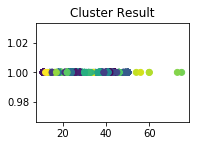

the value_labels are: [  12  220  294  386  603  604  605  606  607  608  609  610  611  612
  613  657  658  659  660  661  662  663  664  665  666  806  849  955
 1234 1241 1252 1267 1301 1358 1607 1626 1656 1900]
the threshold is: 42
----------------------------------------------------------
we are trying to print out cluster 0
the threshold 0 is 44:
the boundary of different cluster is: [44]
we are trying to print out cluster 1
the threshold 1 is 42:
the boundary of different cluster is: [42, 44]
we are trying to print out cluster 2
the threshold 2 is 11:
the boundary of different cluster is: [11, 42, 44]
we are trying to print out cluster 3
the threshold 3 is 26:
the boundary of different cluster is: [11, 26, 42, 44]
we are trying to print out cluster 4
the threshold 4 is 28:
the boundary of different cluster is: [11, 26, 28, 42, 44]
we are trying to print out cluster 5
the threshold 5 is 21:
the boundary of different cluster is: [11, 21, 26, 28, 42, 44]
we are trying to print out

In [15]:
# Using DBSCAN to cluster the raw logs
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

print('X is:', X)
print('Y is:', Y)
def cluster_dbscan(X, Y):
    #X = StandardScaler().fit_transform(X)
    # we set the min_samples small when we are testing
    # based on testing, we set eps to 4
    matrix = np.column_stack((X,Y))
    # db here is not model, it is the result of fitting matrix
    
    # db = DBSCAN(eps=4, min_samples=1).fit(matrix) ----- we use the parameter values for small dataset
    db = DBSCAN (eps=0.0001, min_samples=1).fit(matrix)
    '''
    with eps=0.5 | 0.1  min_samples=4 ----- cluster number is 32
    with eps=3 min_samples=4 ---- cluster number is 3 ---- not proper
    with eps=0.1 min_samples=5 ---- cluster_number is 30
    with eps=0.1 min_samples=3 ---- cluster_number is 33 
    with eps=0.1 min_samples=2 ---- cluster_number is 39 ---- get 57 logs ungrouped
    with eps=0.01 min_samples=1 ---- cluster_number is 44 ---- is what we choose
    '''
    
    #core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    #core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    print(labels)
    cluster_number = len(set(labels))
    print("the number of cluster is:", cluster_number)
    # picture the result
    plt.subplot(221)
    # c should be the sequence number
    plt.scatter(X[:,0], Y[:,0], c = db.labels_)
    plt.title('Cluster Result')
    plt.show()
    
    values_labels = ClusterIndicesNumpy(1, db.labels_)
    print('the value_labels are:',values_labels)
    list_indices=[]
    
    for i in values_labels:
        # threshold_indice = max(values_labels)
        list_indices.append(X[:][i])
    # print(list_indices)
    print('the threshold is:',int(max(list_indices)))
    threshold1 = int(max(list_indices))
    print('----------------------------------------------------------')
    
    return cluster_number,db

cluster_number,db = cluster_dbscan(X, Y)

# in order to get the threshold, it is easier to use small dataset, we get the threshold is 16, we can
# not get the best performance throught the larget dataset, while in cluster_raw_log_keys_lists.py file
# we improve the performance by modifying the threshold manually(we can still see the minimized threshold is 11)
def threshold_list_create(cluster_number, db):
    # threshold_list is used to split different patterns of logs
    threshold_list = []

    for i in range(cluster_number):
        print("we are trying to print out cluster %d"%i)
        # cluster 1 is the inner-class distance, we will use that 
        # get the indices of data
        values_labels = ClusterIndicesNumpy(i, db.labels_)
        list_indices=[]
        for j in values_labels:
            # threshold_indice = max(values_labels)
            list_indices.append(X[:][j])
        #print(list_indices)
        print('the threshold %d is %d:'%(i,int(max(list_indices))))
        threshold_list.append(int(max(list_indices)))
        threshold_list.sort()
        print("the boundary of different cluster is:",threshold_list)
    
    return threshold_list

threshold_list = threshold_list_create(cluster_number, db)


In [16]:
# create the lists belong to different clusters
# we will use the cluster number in last result
def cluster_raw_log_keys_lists(filename, cluster_number, threshold_list):
    # we got the threshold is 16 for the clustering in log_key.ipynb
    # if the distance weight is below the threshold, we will move the two compared logs to a group
    threshold = 16
    cluster_lists = []
    # here, threshold0 = threshold
    # create different lists of clusters
    cluster_list = [[] for i in range(cluster_number)]
    #for i in range(cluster_number):
    #    cluster_number + 'i'= []
        
    with open(filename, 'r') as f:
        # we should build a recursive function to do that
        contexts = f.readlines()

        for i in range(len(contexts)-1):
            for j in range(len(threshold_list)):
                try:
                    print("Compare two raw logs!")
                    print(contexts[i])
                    print(contexts[i + 1])
                    # print(str(brew_distance.distance(contexts[i], contexts[i+1]))[1:3])
                    distance = str(brew_distance.distance(contexts[i], contexts[i + 1]))[1:3]
                except brew_distance.BrewDistanceException as error:
                    print(str(error))

                print("the distance is:", distance)
                
                # the process of comparation
                
                if int(distance) <= threshold_list[i]:
                    cluster_list[i].append(contexts[i])
                    cluster_list[i].append(contexts[i+1])
                elif int(distance) <= threshold_list[i+1]:
                    cluster_list[i].append(contexts[i])
                    cluster_list[i+1].append(contexts[i+1])
        cluster_lists.append(cluster_list+'i')
        
        return cluster_lists

cluster_raw_log_keys_lists('../data/System_logs/lower_erased_message_log.txt',cluster_number, threshold_list)


Compare two raw logs!
authentication failure logname uid euid tty ruser rhost

 check pass user unknown



NameError: name 'brew_distance' is not defined

In [18]:
def pattern_log(lines_lower):
	'''
	input: lines

	process: define new patterns list, find the variable(numerical one)
			set the variable to *, append the found new patterns to patterns

			special notice:
			if the initial x chars for two strings are the same, we can ensure the two strings are the same patterns 
	
    output: found patterns

	we need add separated parts to one string:
		use string+' '+string1+...
	'''
    patterns=[]
	for i in range(len(lines)-1):
        
	# this is the test for find the different part:

# 	for i in range(1,len(lines_lower)-1):
# 		result = []
# 		for a, b in zip(lines_lower[i], lines_lower[i+1]):
# 			if a != b:
# 				break
# 			result.append(a)
# 	return ''.join(result)
        
        # if there is ';' exists, we will fetch the part before that sign as k
        
        # we define the first 5 words are the identifier for different patterns
        
        if lines[i][:5]==lines[i+1][:5]:
            # find the different parts of the same pattern,
            # fetch the first part as the variable and
            # transfer the textual part to numerical part
            dif_part=[]
            
            for j in range(min(len(lines[i]),len(lines[i+1]))):
                
                if lines[i][j]!=lines[i+1][j]:
                    try:
                        int(lines[i][j])
                    except Exception as error:
                        print(error)
                        print('textual data will be transfered to int data')
                        lines[i][j]='*'
                        # we only need to define one variable,this is the sign for us to stop the search
                        dif_part.append(lines[i][j])
                        break
                else:
                    while not len(dif_part):
                        continue
                patterns.append()
            
                
                        
            
        
            
    


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)

In [1]:
lines = read_log_file('data/Linux_10.txt')
lines = transfer_lowercase(lines)
pattern_log(lines)

NameError: name 'read_log_file' is not defined

In [2]:
if __name__=='__main__':
	lines = read_log_file('data/Linux_10.txt')
	lines = transfer_lowercase(lines)
	result = pattern_log(lines)
	print(result)


NameError: name 'read_log_file' is not defined

In [ ]:
# log_analyzer_sql
# build sc example
conf = SparkConf().setAppName('Log Analyzer SQL')
sc = SparkContext(conf = conf)
sqlContext = SQLContext(sc)

# define the path of logFile
logFile = 'data/System_logs/Linux_2k.log'

# build the spark template
# create the persist cache then we can use it later
system_logs = (sc.textFile(logFile).map(parse_system_log).cache())
schema_system_logs = sqlContext.createDataFrame(system_logs)
# register the data tempalte and name it
schema_system_logs.registerTemplate('logs')
